- https://stackoverflow.com/questions/34144632/using-cosine-distance-with-scikit-learn-kneighborsclassifier
you can get the same ordering as the cosine distance by normalizing your data and then using the euclidean distance. So long as you use the uniform weights option, the results will be identical to having used a correct Cosine Distance.


- https://github.com/stanfordnlp/GloVe/blob/765074642a6544e47849bb85d8dc2e11e44c2922/eval/python/evaluate.py#L75-L76
```
#cosine similarity if input W has been normalized
dist = np.dot(W, pred_vec.T)
```

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from sklearn import preprocessing
from importlib import reload
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
def df(x):
    return pd.DataFrame(x).round(2)

### normalize in sklearn

In [5]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

df(X_normalized)

,0,1,2
0,0.41,-0.41,0.82
1,1.00,0.00,0.00
2,0.00,0.71,-0.71


In [6]:
np.linalg.norm(X_normalized, axis=1)

array([1., 1., 1.])

In [7]:
X_normalized = preprocessing.normalize(X, norm='l2', axis=1)
df(X_normalized)

,0,1,2
0,0.41,-0.41,0.82
1,1.00,0.00,0.00
2,0.00,0.71,-0.71


In [8]:
X_normalized = preprocessing.normalize(X, norm='l2', axis=0)
df(X_normalized)                                    

,0,1,2
0,0.45,-0.71,0.89
1,0.89,0.00,0.00
2,0.00,0.71,-0.45


In [9]:
np.linalg.norm(X_normalized, axis=0)

array([1., 1., 1.])

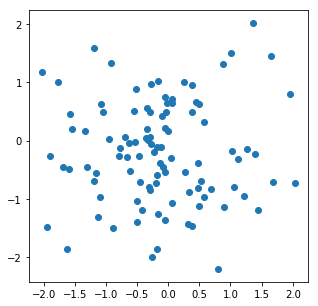

In [22]:
n_samples = 100
n_features = 2
X = np.random.randn(n_samples, n_features)
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1])

In [24]:
X_normalized = preprocessing.normalize(X, norm='l2')
np.linalg.norm(X_normalized, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

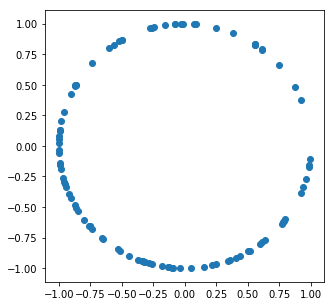

In [25]:
plt.figure(figsize=(5, 5))
plt.scatter(X_normalized[:,0], X_normalized[:,1])

### cosine similarity in sklearn

In [10]:
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

import numpy as np

In [32]:
x = np.array([2, 2]).reshape(1, -1)
y = np.array([2, 0]).reshape(1, -1)
1 - cosine(x, y), cosine_similarity(x, y)[0][0]

(0.7071067811865475, 0.7071067811865475)

In [33]:
x = np.array([2, 2]).reshape(1, -1)
y = np.array([-2, 0]).reshape(1, -1)
1 - cosine(x, y), cosine_similarity(x, y)[0][0]

(-0.7071067811865475, -0.7071067811865475)

### normalize v.s. cosine

In [36]:
n_samples = 10
n_features = 5
X = np.random.uniform(0, 2, size=(n_samples, n_features))
df(X)

,0,1,2,3,4
0,0.03,1.15,1.60,0.17,0.72
1,1.43,1.32,0.34,0.66,0.56
2,0.39,0.59,1.07,0.97,1.94
3,1.08,1.64,0.68,1.99,0.62
4,1.72,1.72,0.88,1.38,0.74
5,0.85,0.48,1.83,1.62,1.82
6,0.20,0.30,1.14,0.24,0.93
7,1.00,0.03,2.00,1.80,0.33
8,1.92,0.33,1.07,1.67,0.44
9,1.66,0.28,0.62,1.25,0.97


In [ ]:
plt.scatter(X[:,0], X[:,1])

In [37]:
Y = np.random.uniform(-1, 3, size=(n_samples, n_features))
df(Y)

,0,1,2,3,4
0,2.32,1.50,2.00,2.53,-0.47
1,0.52,-0.26,1.25,2.30,-0.55
2,2.02,0.76,1.86,2.08,0.05
3,-0.38,2.49,0.96,-0.18,2.04
4,0.06,1.21,-0.70,1.82,2.03
5,-0.27,1.36,2.42,0.80,2.30
6,2.22,-0.58,0.51,0.35,-0.98
7,0.64,-0.10,0.63,-0.19,1.48
8,0.99,1.92,1.74,-0.44,0.94
9,1.73,1.30,2.14,-0.64,2.58


In [38]:
df(cosine_similarity(X, Y))

,0,1,2,3,4,5,6,7,8,9
0,0.57,0.30,0.58,0.82,0.31,0.93,-0.08,0.53,0.90,0.79
1,0.80,0.34,0.78,0.56,0.57,0.51,0.41,0.45,0.75,0.68
2,0.51,0.37,0.60,0.72,0.74,0.91,-0.08,0.81,0.64,0.80
3,0.88,0.65,0.86,0.52,0.71,0.61,0.25,0.29,0.59,0.49
4,0.89,0.52,0.87,0.56,0.60,0.61,0.39,0.44,0.74,0.66
5,0.70,0.61,0.79,0.56,0.61,0.87,0.16,0.72,0.63,0.75
6,0.51,0.36,0.61,0.70,0.40,0.96,0.01,0.80,0.78,0.87
7,0.87,0.88,0.93,0.20,0.30,0.64,0.47,0.40,0.47,0.49
8,0.92,0.76,0.97,0.18,0.42,0.47,0.66,0.45,0.49,0.54
9,0.80,0.60,0.87,0.30,0.58,0.53,0.54,0.63,0.51,0.65


In [42]:
np.allclose(np.dot(X, Y.T), cosine_similarity(X, Y))

False

In [43]:
X_normalized = preprocessing.normalize(X, norm='l2')
Y_normalized = preprocessing.normalize(Y, norm='l2')

np.linalg.norm(X_normalized, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
cosine_similarity(X_normalized, Y_normalized)

array([[ 0.56645371,  0.29601597,  0.57942154,  0.81742622,  0.3145002 ,
         0.92536558, -0.07744727,  0.52806354,  0.9024711 ,  0.78924162],
       [ 0.80102823,  0.34248192,  0.77825478,  0.55893495,  0.57172077,
         0.50596205,  0.40802853,  0.45066084,  0.74618914,  0.6806657 ],
       [ 0.50872781,  0.36909287,  0.60198648,  0.71886744,  0.73607976,
         0.91419326, -0.0769537 ,  0.80678491,  0.64110452,  0.79664401],
       [ 0.88095464,  0.64727709,  0.85519065,  0.52361755,  0.71334936,
         0.60655321,  0.25004164,  0.29041487,  0.58562728,  0.48656501],
       [ 0.88768349,  0.51812189,  0.87368145,  0.55973974,  0.60098298,
         0.60802037,  0.38891526,  0.4373574 ,  0.73919875,  0.66437668],
       [ 0.70247695,  0.60800615,  0.79363656,  0.55829807,  0.60992152,
         0.87281695,  0.16086368,  0.72066816,  0.62757292,  0.74716154],
       [ 0.51481096,  0.35640665,  0.61143454,  0.69547102,  0.40363354,
         0.9582691 ,  0.0084403 ,  0.80220757

In [45]:
np.allclose(cosine_similarity(X, Y), cosine_similarity(X_normalized, Y_normalized))

True

In [46]:
np.allclose(np.dot(X_normalized, Y_normalized.T), cosine_similarity(X_normalized, Y_normalized))

True

So the euclidean distance will degrade to  $\sqrt{2 − 2x^T y}$, i.e., $\sqrt{2 - 2 \times cosine_sim}$

In [47]:
np.sqrt(sum((X_normalized[0] - Y_normalized[0])**2)), np.linalg.norm(X_normalized[0] - Y_normalized[0])

(0.9311780615602708, 0.9311780615602708)

In [48]:
np.sqrt(2 - 2 * np.dot(X_normalized[0], Y_normalized[0])), np.linalg.norm(X_normalized[0] - Y_normalized[0])

(0.9311780615602707, 0.9311780615602708)

In [49]:
np.sqrt(2 - 2 * cosine_similarity(X_normalized[0].reshape(1, -1), Y_normalized[0].reshape(1, -1)))

array([[0.93117806]])